## ABLSTM Tutorial

This tutorial is composed for testing purpose only. For more detailed instructions, please refer to README.md.

### Initialization

#### `ablstm.ModelLSTM.__init__()`
> Initializes an LSTM model with the given paramters.

Parameters:

1. `embedding_dim`: *int, default is 64*
> Embedding layer dimensions.
2. `hidden_dim`: *int, default is 64*
> Hiddden layer dimensions.
3. `device`: *str, default is 'cpu'*
> Device that the model will be mounted on. If GPU is available and CUDA is properly installed, you can assign `"cuda:0"` (or `"cuda:<DEVICE_INDEX>"` if you have more GPUs) that will greatly accelerate training and evaluation process.   
4. `gapped`: *bool, default is True*
> Indicate whether the input sequences contains gaps. A gap is always signified by `"-"`.
5. `fixed_len`: *bool, default is True*
> Indicate whether the input sequences share equal length. It can be set `False` without any issue in all circumstances, but when the sequence lengths are assured to be the same, setting it `True` will help speed up the computation significantly.

In [1]:
from ablstm import ModelLSTM

# initialize model
# change device to 'cpu' if CUDA is not working properly
model = ModelLSTM(embedding_dim=64, hidden_dim=64, device='cuda:0', gapped=True, fixed_len=True)
print('Model initialized.')

Model initialized.


### Training

#### `ablstm.ModelLSTM.fit()`
> Fit the model via the given training and validation data.

Parameters:

1. `trn_fn`: *str*
> Data file for training.
2. `vld_fn`: *str*
> Data file for validation.
3. `n_epoch`: *int, default is 10*
> Number of epochs.
4. `trn_batch_size`: *str, default is 128*
> Batch size during training. `-1` means whole batch.
5. `vld_batch_size`: *str, default is 512*
> Batch size during validation. `-1` means whole batch.
6. `lr`: *float, default is 0.002*
> Learning rate. The fitting process uses Adam algorithm for optimization.
7. `save_fp`: *str, optional, default is None*
> Path to save models. `None` or `""` means training without saving. If a valid path is given, model will be saved under the path after each epoch as long as the validation performance is better than the past.

In [2]:
# data files
trn_fn = './data/sample/human_train.txt'
vld_fn = './data/sample/human_val.txt'

# fit model w/o save
model.fit(trn_fn=trn_fn, vld_fn=vld_fn, n_epoch=1, trn_batch_size=128, vld_batch_size=512, lr=.002, save_fp=None)
# # fit model w/ save
# model.fit(trn_fn=trn_fn, vld_fn=vld_fn, n_epoch=1, trn_batch_size=128, vld_batch_size=512, lr=.002, save_fp='./saved_models/tmp')
print('Done.')

          (VLD): 100%|| 76515/76515 [00:04<00:00, 16942.72seq/s, loss=0.665786, acc=0.828503]


Done.


### Evaluation

#### `ablstm.ModelLSTM.eval()`
> scores the given sequences.

Parameters:

1. `fn`: *str*
> Data file for evaluation.
2. `batch_size`: *int, default is 512*
> Batch size. -1 means whole batch.

Returns:

1. `scores`: *NumPy ndarray*
> 1-D NumPy array consists of all sequences' scores. Order is preserved.

In [3]:
# data file names
human_tst_fn = './data/sample/human_test.txt'
mouse_tst_fn = './data/sample/mouse_test.txt'

# evaluate
print('Evaluating human sequences...')
human_tst_scores = model.eval(fn=human_tst_fn, batch_size=512)
print('Evaluating mouse sequences...')
mouse_tst_scores = model.eval(fn=mouse_tst_fn, batch_size=512)
print('Done.')

Evaluating human sequences...


100%|| 76515/76515 [00:06<00:00, 11668.01seq/s]


Evaluating mouse sequences...


100%|| 500000/500000 [00:43<00:00, 11385.79seq/s]


Done.


Let's visualize the result.

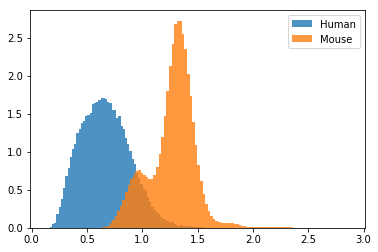

In [5]:
import matplotlib.pyplot as plt
plt.hist(human_tst_scores, bins=100, alpha=0.8, density=True, label='Human')
plt.hist(mouse_tst_scores, bins=100, alpha=0.8, density=True, label='Mouse')
plt.legend()
plt.show()

### Save, load & change device

#### `ablstm.ModelLSTM.save()`
> Save model.

Parameters:

1. `fn`: *str*
> Save file name.

#### `ablstm.ModelLSTM.load()`
> Load model from the given file. Please note that when `load()` method is invoked, all parameters will be overloaded except `device`. You may call `ablstm.ModelLSTM.to()` method to switch among different devices.

Parameters:

1. `fn`: *str*
> Model file name.

Returns:

1. `model`: *ablstm.ModelLSTM*
> Loaded model.

#### `ablstm.ModelLSTM.to()`
> Assign device.

Parameters:
1. `device`: *str, default is "cpu"*
> Device to mount.

In [8]:
# save model
model.save('./saved_models/tmp/model_tmp.npy')
print('Model saved to ./saved_models/tmp/model_tmp.npy.')

# load model
model_loaded = ModelLSTM()
model_loaded.load('./saved_models/tmp/model_tmp.npy')
print('Model loaded from ./saved_models/tmp/model_tmp.npy.')

# # data file names
# human_tst_fn = './data/sample/human_test_vlen.txt'
# mouse_tst_fn = './data/sample/mouse_test_vlen.txt'

# # evaluate
# print('Evaluating human sequences...')
# human_tst_scores = model_loaded.eval(fn=human_tst_fn, batch_size=512)
# print('Evaluating mouse sequences...')
# mouse_tst_scores = model_loaded.eval(fn=mouse_tst_fn, batch_size=512)
# print('Done.')

Model saved to ./saved_models/tmp/model_tmp.npy.
Model loaded from ./saved_models/tmp/model_tmp.npy.
